In [1]:
import os
import cv2
import numpy as np

from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline


Loading our Classification Model

In [2]:
model = load_model(r"..\Model\SportsClassificationModel.keras")

In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,634,571 (219.86 MB)

 Trainable params: 19,211,523 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,423,048 (146.57 MB)

In [4]:
#Loading Sport Class Labels 
Sports_Labels=os.listdir('../data')
Sports_Labels

['badminton', 'cricket', 'football']

Method for Image Loading and Preprocessing



Required For Image Pridiction

In [5]:

from keras.preprocessing.image import load_img, img_to_array

def load_and_preprocess_images(file, img_size=(224, 224)):
    images = []
    # for filename in os.listdir(folder_path):
    img = load_img((file), target_size=img_size)
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    images.append(img_array)
    return np.array(images),img


def pridictImage(filepath):
    pic,img = load_and_preprocess_images(filepath)
    plt.matshow(img)
    p = model.predict(pic)
    print(p)

    print("\nBadminton : ", (p[0][0]*100) ,"%")
    print("Cricket   : ", (p[0][1]*100) ,"%")
    print("Football  : ", (p[0][2]*100) ,"%")
    print("\n\nClass Pridicted : ",Sports_Labels[np.argmax(p)])


Pridicting custom Images From our Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[1.6778653e-08 2.1397302e-06 9.9999785e-01]]

Badminton :  1.6778653e-06 %
Cricket   :  0.00021397302 %
Football  :  99.99979 %


Class Pridicted :  football


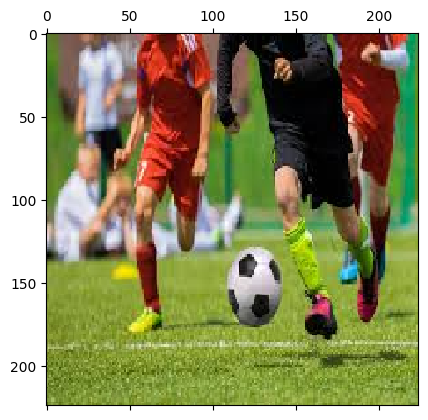

In [14]:
filepath='../Demo/IMAGES/Image21.jpeg'
pridictImage(filepath)


Pridiction on Custom Videos

In [15]:
import shutil

from collections import Counter
from scipy import stats

from IPython.display import Video

In [16]:
#Method to extract Frames from a video

import shutil

def extract_frames(video_path, output_folder):
    if os.path.exists(output_folder):
        shutil.rmtree(output_folder)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    cap = cv2.VideoCapture(video_path)
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frame_path = os.path.join(output_folder, f"frame_{count:04d}.jpg")
        cv2.imwrite(frame_path, frame)
        count += 1
    cap.release()
    return count


In [17]:
#Method to load each frame and perform preprocessing

def load_and_preprocess_frames(folder_path, img_size=(224, 224)):
    images = []
    for filename in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, filename), target_size=img_size)
        img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
    return np.array(images)

In [18]:
#Method to Pridict a Video

def predict_video(video_path):
    n = extract_frames(video_path, 'Temp')
    images = load_and_preprocess_frames('Temp')
    predictions = model.predict(images)

    pridict_label=[ np.argmax(i) for i in predictions ]

    item_counts = Counter(pridict_label)
    print("\n Badminton : ", item_counts[0]*100/n ,"%")
    print(" Cricket   : ", item_counts[1]*100/n ,"%")
    print(" Football  : ", item_counts[2]*100/n ,"%")

    mode_result = stats.mode(pridict_label)
    print("\n Final Pridiction :", Sports_Labels[mode_result.mode])

    return predictions,n

In [19]:
video_path='../Demo/VIDEOS/TestVideo22.mp4'
predictions, n=predict_video(video_path)   #n is the total number of frames extracted


14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 294ms/step

 Badminton :  2.347417840375587 %
 Cricket   :  42.95774647887324 %
 Football  :  54.694835680751176 %

 Final Pridiction : football


In [20]:
Video(video_path, embed=True, width=400, height=400)